# Plotting maps in Python

## The Basemap library

If you want to display maps from python, you'll need a package like Basemap installed.  To do this, go to your terminal window and type:

conda install basemap

This will take a little while... you might want to do something else while it installs. Like read the Basemap tutorials at https://basemaptutorial.readthedocs.org/en/latest/

## Plotting the world

The world is spherical (strictly speaking, an oblate spheriod, e.g. not quite round, and slightly flattened at the ends https://en.wikipedia.org/wiki/Figure_of_the_Earth) and we're trying to represent that in two dimensions, e.g. as a flat plane.  When we plot the world, we have choices to make about how that 'flattening' happens: do we preserve the directions between points, the relative sizes of landmasses etc. 

This West Wing clip https://www.youtube.com/watch?v=vVX-PrBRtTY is a good place to start understanding map projections, as is the XKCD cartoon https://xkcd.com/977/.  The list of Basemap map projections is at http://matplotlib.org/basemap/users/mapsetup.html.  If you want to start adding points to this map, there's a good tutorial at http://introtopython.org/visualization_earthquakes.html

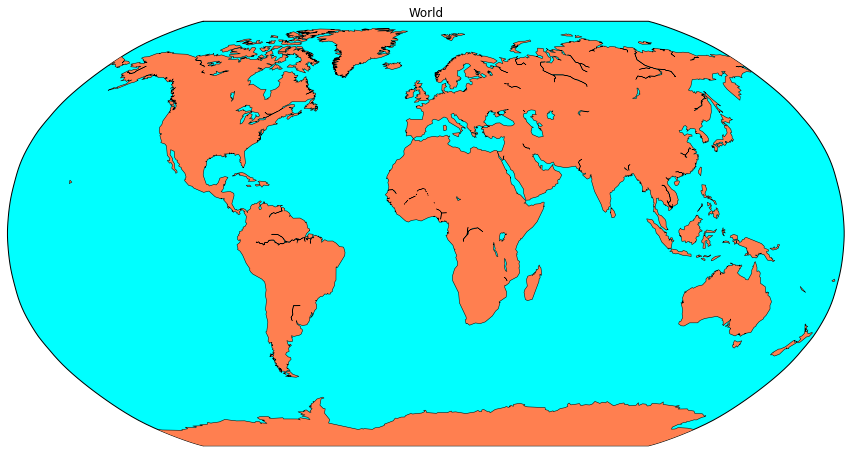

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(15,15))
worldmap = Basemap(projection='robin', lat_0=0, lon_0=0)

worldmap.drawmapboundary(fill_color='aqua')
worldmap.drawcoastlines(linewidth=0.5)
worldmap.fillcontinents(color='coral',lake_color='aqua')
plt.title('World')

## Plotting pieces of the world

Basemap includes the outlines of most major landmasses in the world, in several projections, and functions to plot those projections. 

You can select part of the world by using a bounding box (this lists the lat-longs of each corner of an imaginary box around the area you're interested in).  You can work out where these corners are using Google maps, or you can use values from the country-bounding-boxes library (pip install country-bounding-boxes). 

m.etopo adds topological features (land height, sea depth) to the map.

Latitudes and longitudes go from -90 to +90 and -180 to 180 in Basemap; - for south; + for north, - for west; + for east.  

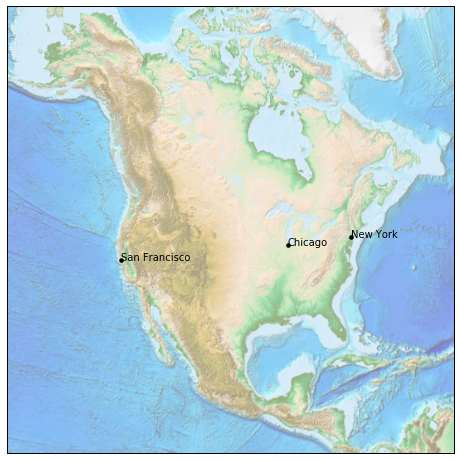

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))
usmap = Basemap(projection='lcc', resolution=None,
width=8000000, height=8000000,
lat_0=45, lon_0=-100,)
usmap.etopo(scale=0.5, alpha=0.5)

cities = {
    'New York': [40.7, -74.0], #[lat, lon]
    'Chicago': [41.8, -87.6],
    'San Francisco': [37.7, -122.4]
}

for cityname, cityloc in cities.items():
    x, y = usmap(cityloc[1], cityloc[0])
    plt.plot(x, y, 'ok', markersize=4)
    plt.text(x, y, cityname, fontsize=10)

## Plotting shapefiles

(3644,
 5,
 [29.589529258000027, -11.762349213999926, 0.0, 0.0],
 [40.444734823000026, -0.9831430169999267, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x125a91eb8>)

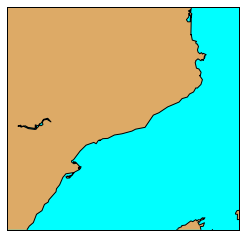

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()

map.readshapefile('example_data/TZwards/TZwards', 'TZwards')
